
<center><font size="10">Python tools for nice plots</font>




*Climate Risk Assessment 2021, lecture n°10, Pauline Rivoire*

In [1]:
# importing libraries as an alias so that we know which function belongs to which library
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from IPython import display

# Geographic ploting
import cartopy.crs as ccrs
import cartopy.feature as cfeature;

In [2]:
path_to_data='/climriskdata/'

# Contour plot settings

Readibility details, like font size and color bars, make a huge difference in communicating your results. The less time the reader spends on understanding your plots, the faster s.he can focus on the message you want to convey.

## Colormaps

### Categories of colormaps

There are 3 categories of colormaps: 
* Sequential colormaps: one continuous sequence of colors (e.g. viridis),
    
    
* Divergent colormaps: usually containing two distinct colors, to highlight positive and negative deviations from a mean (e.g. RdBu),
    
    
* Qualitative colormaps: mix colors with no particular sequence (e.g. rainbow or jet).

Here are some colorbars provided by `matplotlib` (reference: https://matplotlib.org/stable/tutorials/colors/colormaps.html)


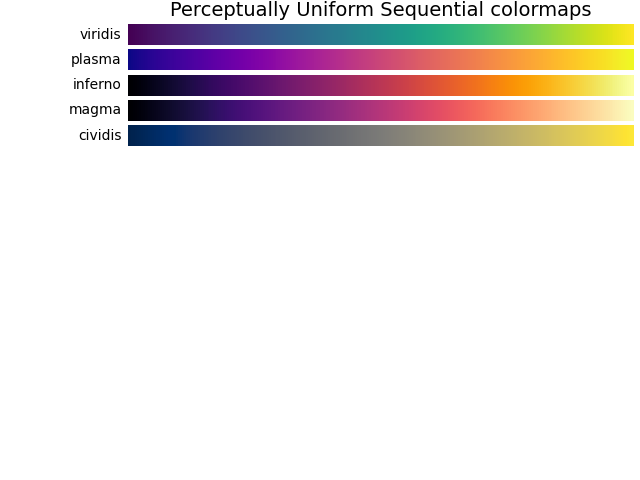

In [3]:
display.Image("https://matplotlib.org/stable/_images/sphx_glr_colormaps_001.png")

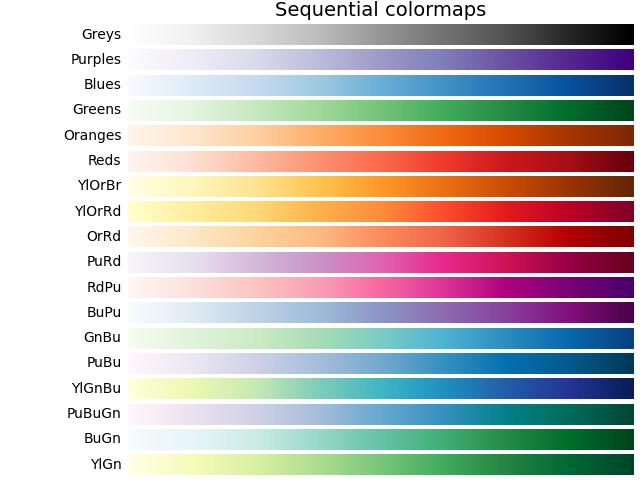

In [4]:
display.Image("https://matplotlib.org/stable/_images/sphx_glr_colormaps_002.png")

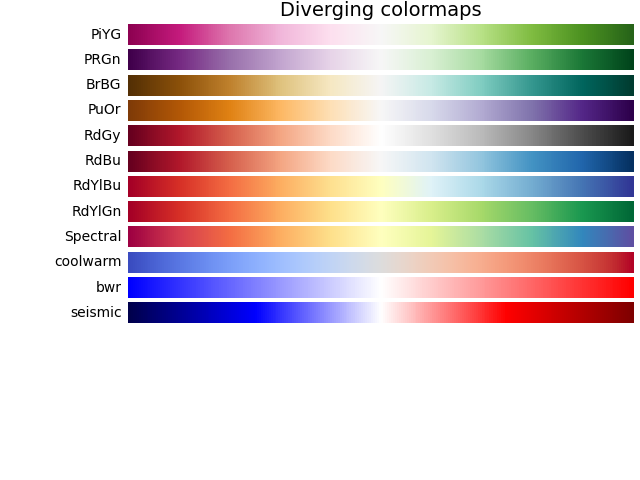

In [5]:
display.Image("https://matplotlib.org/stable/_images/sphx_glr_colormaps_004.png")

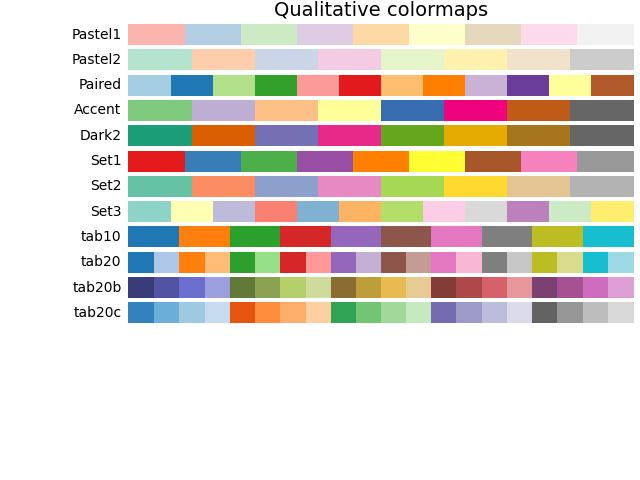

In [6]:
display.Image("https://matplotlib.org/stable/_images/sphx_glr_colormaps_006.png")

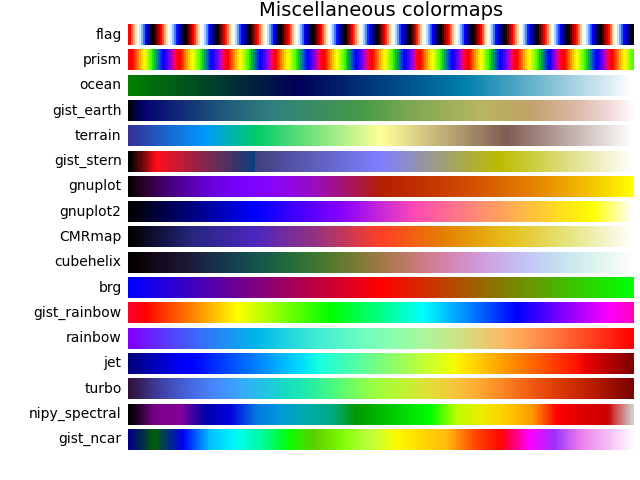

In [7]:
display.Image("https://matplotlib.org/stable/_images/sphx_glr_colormaps_007.png")

* One has to choose wisely a colormap from large variety. It has to be suitable for type of data to plot.

* Human eye perception is also an important parameter to take into account.

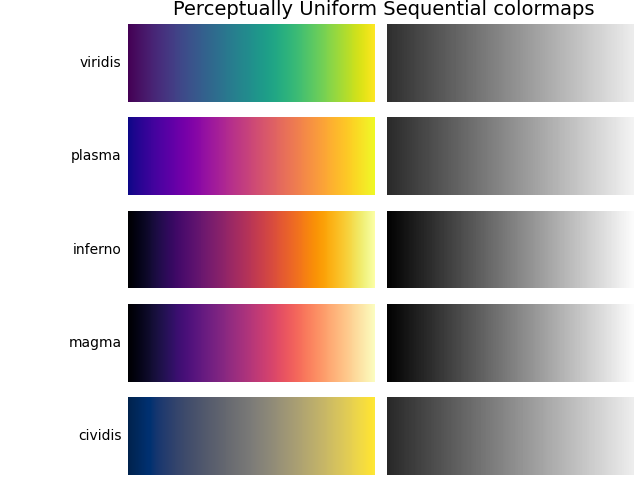

In [8]:
display.Image("https://matplotlib.org/stable/_images/sphx_glr_colormaps_015.png")

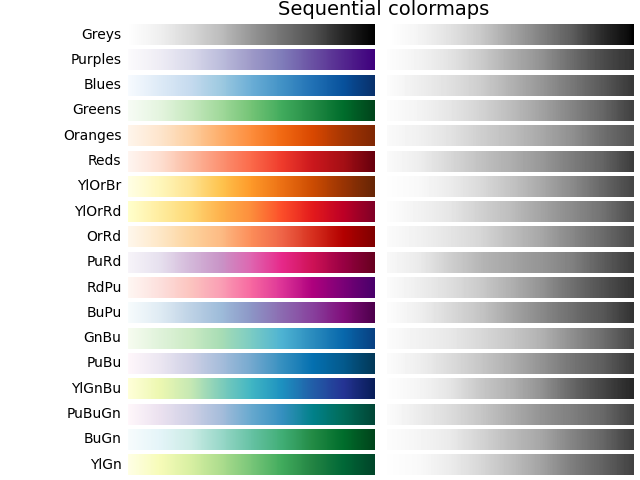

In [9]:
display.Image("https://matplotlib.org/stable/_images/sphx_glr_colormaps_016.png")

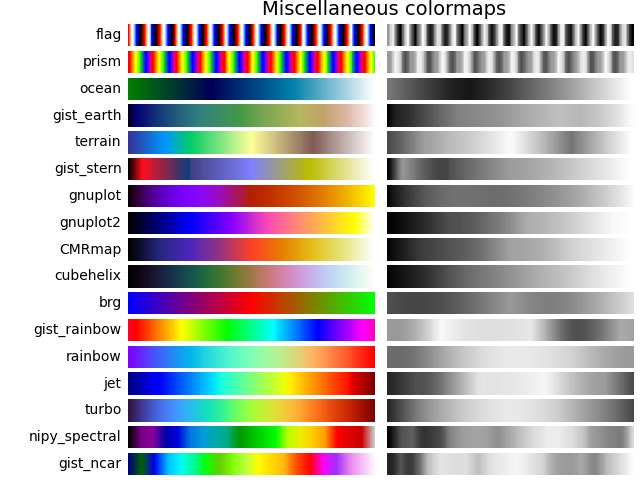

In [10]:
display.Image("https://matplotlib.org/stable/_images/sphx_glr_colormaps_021.png")

### ***\#endtherainbow***

In [11]:
#Don't pay too much attention on the cells of this section, just run them
class Tweet(object):
    def __init__(self, embed_str=None):
        self.embed_str = embed_str

    def _repr_html_(self):
        return self.embed_str

In [12]:
Tweet("""
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Difference between color palettes with monotonic and non-monotonic lightness functions. Data are 72 hours of surface temperature. Non-monotonic palette is more dramatic, but perceptually misrepresents temperature gradients.🎨🌎🌡️ <a href="https://twitter.com/hashtag/EarthEngine?src=hash&amp;ref_src=twsrc%5Etfw">#EarthEngine</a> lava lamp.<a href="https://t.co/3kuHcuusgr">https://t.co/3kuHcuusgr</a> <a href="https://t.co/rCzSzIsNyy">pic.twitter.com/rCzSzIsNyy</a></p>&mdash; Justin Braaten (@jstnbraaten) <a href="https://twitter.com/jstnbraaten/status/1210631357317074944?ref_src=twsrc%5Etfw">December 27, 2019</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 
""")

In [13]:
Tweet("""
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Transitions between some colors are accompanied by a major change in lightness trajectory (e.g., yellow to red) which can make the data represented by these colors appear to have a steeper gradient than the same data delta represented by a different color transition.</p>&mdash; Justin Braaten (@jstnbraaten) <a href="https://twitter.com/jstnbraaten/status/1210683184561577984?ref_src=twsrc%5Etfw">December 27, 2019</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 
""")

* The uneven brightness can potentially emphasize unimportant parts of the dataset.

There is even a hashtag #endtherainbow ! 
https://twitter.com/JoannaMerson/status/1210765303107342337. See also the article "Rainbow Color Map (Still) Considered Harmful" https://ieeexplore.ieee.org/document/4118486

* Generally speaking, _qualitative colormaps_ shouldn't be used to represent _quantitative data_.

## Using the existing color palettes

### Example of sequential colormap

In [14]:
date = '20710101-20711231'
myPrecipfile = xr.open_dataset(path_to_data+'EUR-11S/ICHEC-EC-EARTH_CLMcom-CCLM4-8-17_v1/rcp85/pr/pr_EUR-11_ICHEC-EC-EARTH_rcp85_r12i1p1_CLMcom-CCLM4-8-17_v1_day_' + date+'_LL.nc')
myPrecipfile

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 409, lon: 471, time: 365)
Coordinates:
  * time       (time) datetime64[ns] 2071-01-01T12:00:00 ... 2071-12-31T12:00:00
  * lon        (lon) float64 -10.0 -9.9 -9.8 -9.7 -9.6 ... 36.7 36.8 36.9 37.0
  * lat        (lat) float64 30.0 30.1 30.2 30.3 30.4 ... 70.5 70.6 70.7 70.8
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    pr         (time, lat, lon) float32 ...
Attributes:
    CDI:                            Climate Data Interface version ?? (http:/...
    history:                        Thu Mar 12 16:58:17 2020: cdo selyear,207...
    source:                         CLMcom-CCLM4-8-17
    institution:                    Climate Limited-area Modelling Community ...
    Conventions:                    CF-1.4
    institute_id:                   CLMcom
    experiment_id:                  rcp85
    model_id:                       CLMcom-CCLM4-8-17
    contact:                        cordex-cclm@dkrz.de
    comment:                        CORDEX Europe RCM CCLM 0.11 deg EUR-11
    references:                     http://www.clm-community.eu/
    initialization_method:          1
    physics_version:                1
    tracking_id:                    2b1f774e-f140-4544-a9b1-032eb94a3055
    title:                          CLMcom-CCLM4-8-17 model output prepared f...
    CORDEX_domain:                  EUR-11
    driving_experiment:             ICHEC-EC-EARTH, rcp85, r12i1p1
    driving_model_id:               ICHEC-EC-EARTH
    driving_model_ensemble_member:  r12i1p1
    driving_experiment_name:        rcp85
    rcm_version_id:                 v1
    product:                        output
    experiment:                     RCP8.5
    frequency:                      day
    creation_date:                  2014-03-26T06:29:43Z
    project_id:                     CORDEX
    table_id:                       Table day (Sept 2013) 0cf1782745489246c9f...
    modeling_realm:                 atmos
    realization:                    12
    cmor_version:                   2.9.1
    CDO:                            Climate Data Operators version 1.9.3 (htt...

Without specifying any colorbar, we get the default color bar (viridis, for positive data)

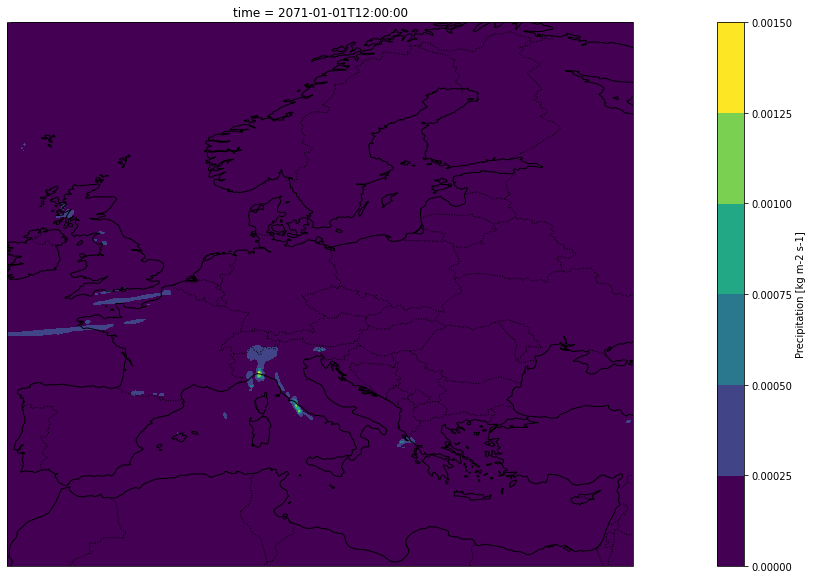

In [15]:
fig = plt.figure(figsize=(30,10))
ax = plt.axes(projection=ccrs.PlateCarree())


#Include a ready-to-use colormap with cmap=<colormap_name>
#/!\ to use a color vector you made yourself (e.g. the MeteoSwiss one), use "colors=" instead of "cmap="
a = myPrecipfile.pr.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree())


ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.add_feature(cfeature.BORDERS, linestyle=':');

This sequential colormap is not very suitable in our context of daily precipitation. Let's change it, and also let's change the precipitation units to mm/day.

In [16]:
data_precip = 60*60*24*myPrecipfile.pr.isel(time=0)

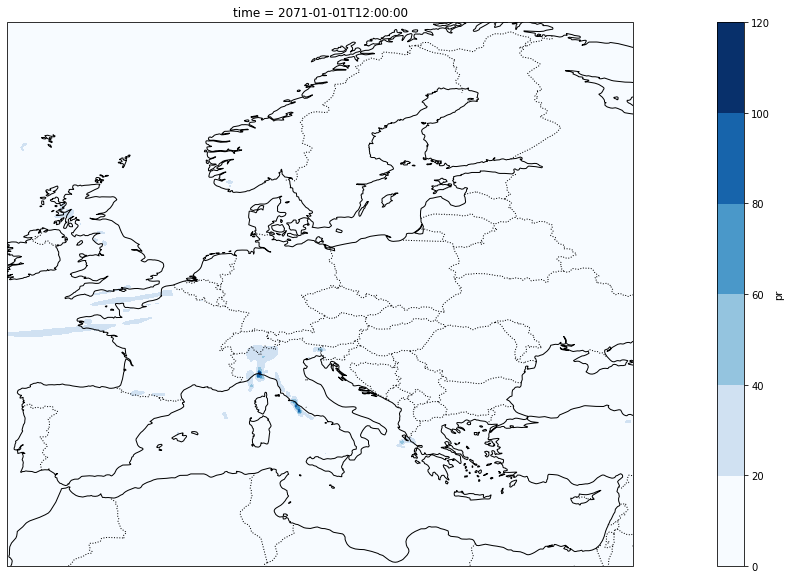

In [17]:
fig = plt.figure(figsize=(30,10))
ax = plt.axes(projection=ccrs.PlateCarree())


#Include a ready-to-use colormap with cmap=<colormap_name>
a = data_precip.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap="Blues")


ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.add_feature(cfeature.BORDERS, linestyle=':');

* The automatic levels not suitable: let's custom them

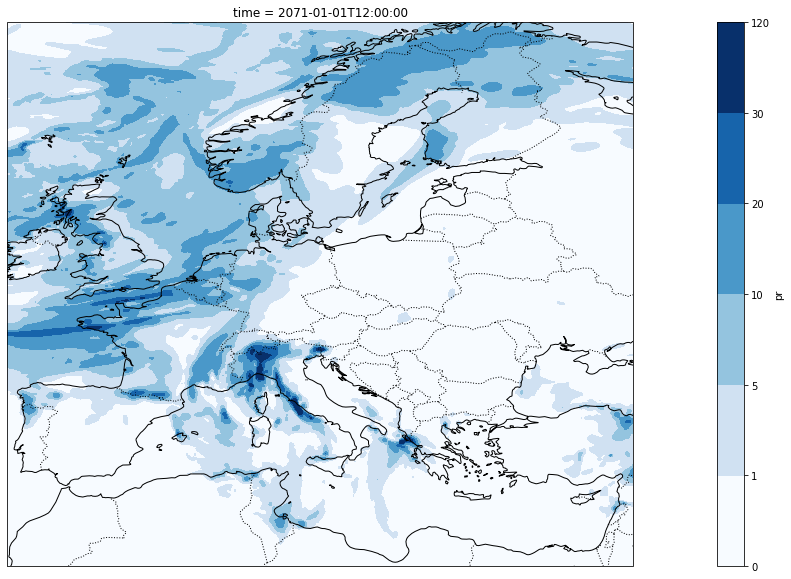

In [18]:
fig = plt.figure(figsize=(30,10))
ax = plt.axes(projection=ccrs.PlateCarree())

my_levels = [0,1,5, 10,20,30,120]

a =data_precip.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels = my_levels, cmap="Blues")


ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.add_feature(cfeature.BORDERS, linestyle=':');

* More explicit title and label would be great:

In [19]:
#For a nice date format
import pandas as pd
from datetime import datetime

In [20]:
#Extract in a nice format the date and time of the dataset we are using
nicetime = pd.to_datetime(data_precip.time.values)
nicetime

Timestamp('2071-01-01 12:00:00')

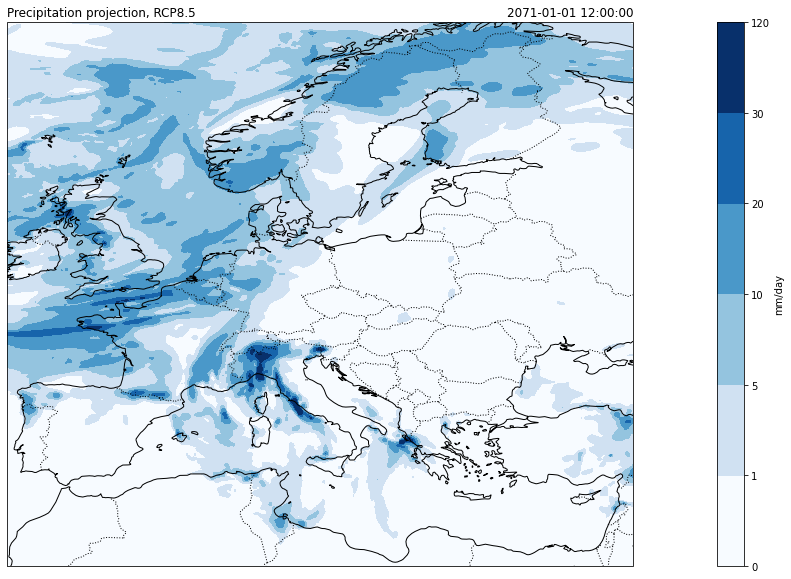

In [21]:
fig = plt.figure(figsize=(30,10))
ax = plt.axes(projection=ccrs.PlateCarree())

my_levels = [0,1,5, 10,20,30,120]

a = data_precip.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels = my_levels, cmap="Blues",
                              add_colorbar=False) #remove the automatic colorbar


ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.add_feature(cfeature.BORDERS, linestyle=':')

#Extract the colorbar from the plot a with axes ax.
#"fraction=" = colorbar size, label=colorbar label
cbar = fig.colorbar(a, ax=ax, fraction = 0.1, label=r'mm/day')

# setting the title
ax.set_title('') # to remove xarray auto-title
ax.set_title(nicetime.strftime("%Y-%m-%d %H:%M:%S"), loc='right');
ax.set_title('Precipitation projection, RCP8.5', loc='left');

* The `seaborn` command `set` is a first solution to have a font size adapted to the context (`notebook`, `paper`, `talk` or `poster`):

In [22]:
import seaborn as sns

In [23]:
sns.set(context="talk")

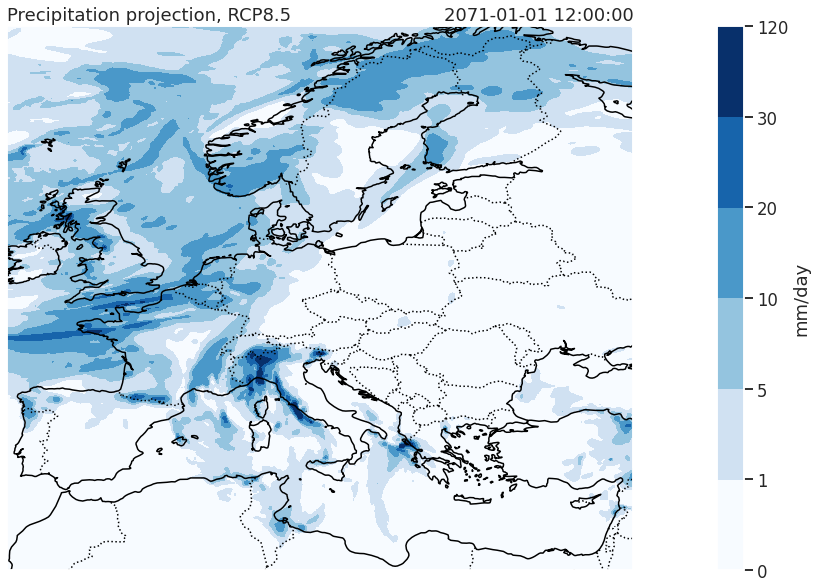

In [24]:
fig = plt.figure(figsize=(30,10))
ax = plt.axes(projection=ccrs.PlateCarree())

my_levels = [0,1,5, 10,20,30,120]

a = data_precip.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels = my_levels, cmap="Blues", add_colorbar=False)

ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.add_feature(cfeature.BORDERS, linestyle=':')

cbar = fig.colorbar(a, ax=ax, fraction = 0.1, label=r'mm/day')


ax.set_title('')
ax.set_title(nicetime.strftime("%Y-%m-%d %H:%M:%S"), loc='right');
ax.set_title('Precipitation projection, RCP8.5', loc='left');

With the context `talk`, border lines are thicker, for a clearer image during a presentation. To just increase the font size and not the lines, you can play with the parameter `font_scale`

In [25]:
sns.set(context="paper", font_scale=2)

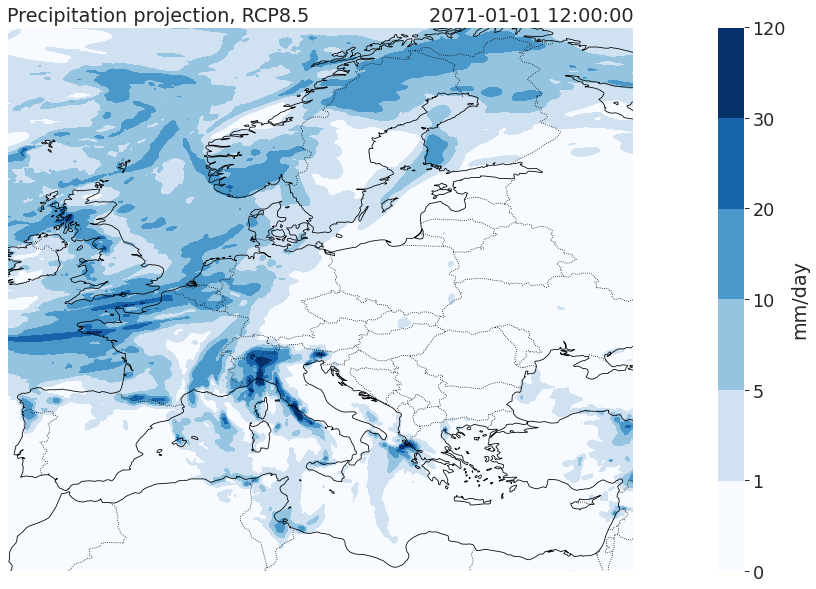

In [26]:
fig = plt.figure(figsize=(30,10))
ax = plt.axes(projection=ccrs.PlateCarree())

my_levels = [0,1,5, 10,20,30,120]

a = data_precip.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels = my_levels, cmap="Blues", add_colorbar=False)

ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.add_feature(cfeature.BORDERS, linestyle=':')

cbar = fig.colorbar(a, ax=ax, fraction = 0.1, label=r'mm/day')


ax.set_title('')
ax.set_title(nicetime.strftime("%Y-%m-%d %H:%M:%S"), loc='right');
ax.set_title('Precipitation projection, RCP8.5', loc='left');

* Once you are satisfied with your plot, you can use the `matplotlib` command `savefig()` to save it at the location of your choice (don't forget to adapt the path)

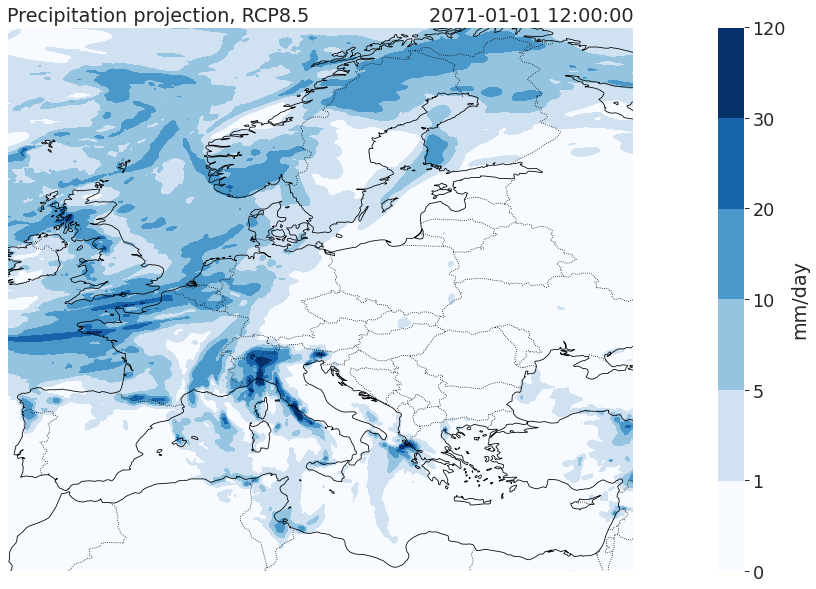

In [27]:
fig = plt.figure(figsize=(30,10))
ax = plt.axes(projection=ccrs.PlateCarree())

my_levels = [0,1,5, 10,20,30,120]

a = data_precip.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels = my_levels, cmap="Blues", add_colorbar=False)

ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.add_feature(cfeature.BORDERS, linestyle=':')

cbar = fig.colorbar(a, ax=ax, fraction = 0.1, label=r'mm/day')


ax.set_title('')
ax.set_title(nicetime.strftime("%Y-%m-%d %H:%M:%S"), loc='right');
ax.set_title('Precipitation projection, RCP8.5', loc='left');

# Adapt the path accordingly
# to remove white space qround the plot: bbox_inches="tight",pad_inches=0
plt.savefig("Figures/daily_precip_projection_"+ nicetime.strftime("%Y-%m-%d")+".png",  bbox_inches="tight",pad_inches=0);

### Example with automatic diverging colorbar

If you provide data with positive and negative values, the default colorbar will be a diverging colorbar 0 will automatically be set as the center of the colorbar, and the colors above or below are assigned to values in a symetric way. This only works if the user doesn't define the `levels`.
Let's illustrate this with temperature data:

In [28]:
ds_tasmax=xr.open_dataset("/climriskdata/EUR-11S/ICHEC-EC-EARTH_CLMcom-CCLM4-8-17_v1/rcp85/tasmax/tasmax_EUR-11_ICHEC-EC-EARTH_rcp85_r12i1p1_CLMcom-CCLM4-8-17_v1_day_"+date+"_LL.nc")
ds_tasmax

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 409, lon: 471, time: 365)
Coordinates:
  * time       (time) datetime64[ns] 2071-01-01T12:00:00 ... 2071-12-31T12:00:00
  * lon        (lon) float64 -10.0 -9.9 -9.8 -9.7 -9.6 ... 36.7 36.8 36.9 37.0
  * lat        (lat) float64 30.0 30.1 30.2 30.3 30.4 ... 70.5 70.6 70.7 70.8
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    tasmax     (time, lat, lon) float32 ...
Attributes:
    CDI:                            Climate Data Interface version ?? (http:/...
    history:                        Thu Mar 12 16:56:00 2020: cdo selyear,207...
    source:                         CLMcom-CCLM4-8-17
    institution:                    Climate Limited-area Modelling Community ...
    Conventions:                    CF-1.4
    institute_id:                   CLMcom
    experiment_id:                  rcp85
    model_id:                       CLMcom-CCLM4-8-17
    contact:                        cordex-cclm@dkrz.de
    comment:                        CORDEX Europe RCM CCLM 0.11 deg EUR-11
    references:                     http://www.clm-community.eu/
    initialization_method:          1
    physics_version:                1
    tracking_id:                    e9e5b597-d2e3-42e6-83ef-a7349ea535b6
    title:                          CLMcom-CCLM4-8-17 model output prepared f...
    CORDEX_domain:                  EUR-11
    driving_experiment:             ICHEC-EC-EARTH, rcp85, r12i1p1
    driving_model_id:               ICHEC-EC-EARTH
    driving_model_ensemble_member:  r12i1p1
    driving_experiment_name:        rcp85
    rcm_version_id:                 v1
    product:                        output
    experiment:                     RCP8.5
    frequency:                      day
    creation_date:                  2014-03-26T13:31:31Z
    project_id:                     CORDEX
    table_id:                       Table day (Sept 2013) 0cf1782745489246c9f...
    modeling_realm:                 atmos
    realization:                    12
    cmor_version:                   2.9.1
    CDO:                            Climate Data Operators version 1.9.3 (htt...

A quick look at the raw data:

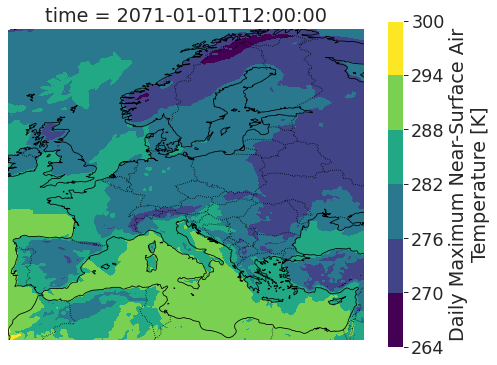

In [29]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-10,37, 30, 69.5])

ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.add_feature(cfeature.BORDERS, linestyle=':')

ds_tasmax.tasmax.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree());

Let's convert the unit to °C, to get positive and negative values. This will change the automatic colorbar

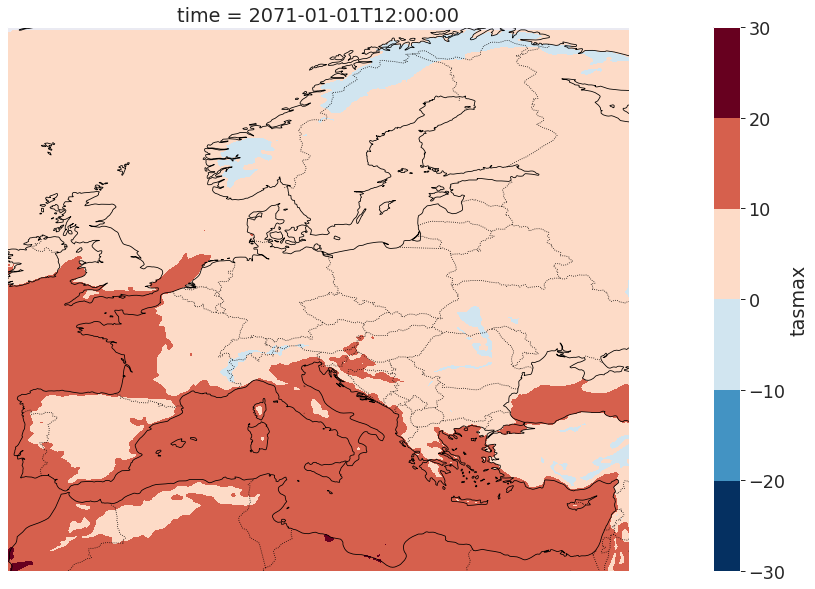

In [30]:
fig = plt.figure(figsize=(30,10))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-10,37, 30, 69.5])

ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.add_feature(cfeature.BORDERS, linestyle=':')

(ds_tasmax.tasmax.isel(time=0)-273).plot.contourf(ax=ax, transform=ccrs.PlateCarree());

Remark: if we want to select the colorbar `"RdBu"`, as red comes first, we have to reverse the palette, adding `"_r"` at the end of the name. This works to reverse any pre-defined colormap.

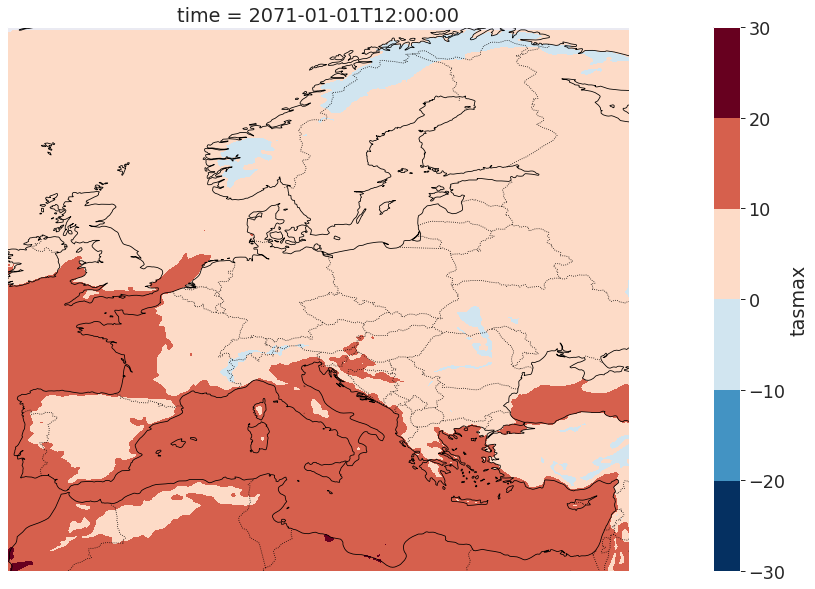

In [32]:
fig = plt.figure(figsize=(30,10))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-10,37, 30, 69.5])

ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.add_feature(cfeature.BORDERS, linestyle=':')

(ds_tasmax.tasmax.isel(time=0)-273).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap="RdBu_r");

## DIY: create and use your colorpalette

#### Using `seaborn ` colormap for custom diverging palettes... And more!

* Extract RGB codes from a ready-to-use palette (ex here a simple `seaborn` palette)

In [33]:
color_ex = sns.color_palette("Blues", n_colors=5)
color_ex

[(0.8406920415224913, 0.9016378316032295, 0.9586620530565167),
 (0.6718954248366014, 0.8143790849673203, 0.9006535947712418),
 (0.41708573625528644, 0.6806305267204922, 0.8382314494425221),
 (0.21568627450980393, 0.5294117647058824, 0.7542483660130719),
 (0.06251441753171857, 0.35750865051903113, 0.6429065743944637)]

* `append()` command to manually add an element at the end of a list.

Here it can be used to complete the sequential colormap with a color for values out of certain boundaries

In [34]:
color_ex.append("Orange")

In [35]:
color_ex

[(0.8406920415224913, 0.9016378316032295, 0.9586620530565167),
 (0.6718954248366014, 0.8143790849673203, 0.9006535947712418),
 (0.41708573625528644, 0.6806305267204922, 0.8382314494425221),
 (0.21568627450980393, 0.5294117647058824, 0.7542483660130719),
 (0.06251441753171857, 0.35750865051903113, 0.6429065743944637),
 'Orange']

Let's use this palette to highlight extreme daily precipitation.
In the function `countourf`, we used the argument `cmap` to indicate the wanted "ready-to-use" color palette. For customized color palette, we have to use the argument `colors`.

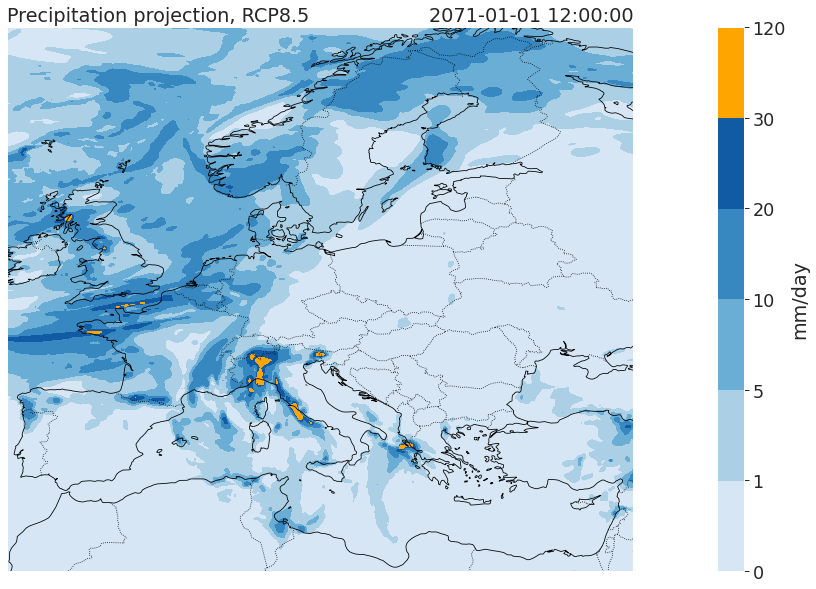

In [36]:
fig = plt.figure(figsize=(30,10))
ax = plt.axes(projection=ccrs.PlateCarree())

my_levels = [0,1,5, 10,20,30,120]

a = data_precip.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels = my_levels,
                              colors=color_ex, add_colorbar=False)

ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.add_feature(cfeature.BORDERS, linestyle=':')

cbar = fig.colorbar(a, ax=ax, fraction = 0.1, label=r'mm/day')


ax.set_title('')
ax.set_title(nicetime.strftime("%Y-%m-%d %H:%M:%S"), loc='right');
ax.set_title('Precipitation projection, RCP8.5', loc='left');

Note that `seaborn` automatically reduces saturation of matplotlib colorbars

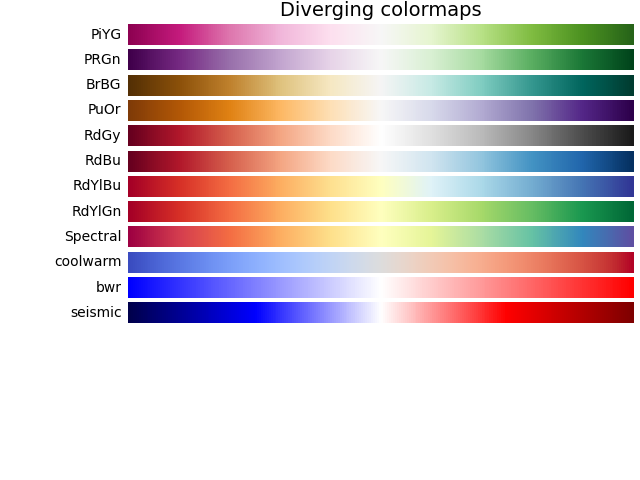

In [37]:
display.Image("https://matplotlib.org/stable/_images/sphx_glr_colormaps_004.png")

In [1]:
sns.color_palette("PiYG", n_colors=10)

NameError: name 'sns' is not defined

In [39]:
sns.color_palette("RdBu", n_colors=10)

[(0.669204152249135, 0.08489042675893888, 0.16401384083044984),
 (0.8115340253748559, 0.3211072664359862, 0.2758169934640523),
 (0.9222606689734717, 0.5674740484429065, 0.4486735870818915),
 (0.9797001153402538, 0.7840830449826989, 0.6848904267589389),
 (0.9792387543252595, 0.9191080353710112, 0.8837370242214533),
 (0.9014225297962323, 0.9367935409457901, 0.956247597078047),
 (0.7324106113033451, 0.8537485582468283, 0.9162629757785468),
 (0.4814302191464823, 0.7148788927335642, 0.839446366782007),
 (0.2366013071895425, 0.5418685121107266, 0.7470203767781622),
 (0.11864667435601693, 0.37923875432525955, 0.6456747404844291)]

* In HSL color system, one color is defined by its hue, its saturation and its ligthness. The `seaborn` function `diverging_palette()` fixes the saturation and the lightess to create a diverging palette between two colors only with their hues.

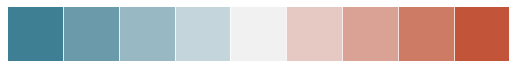

In [40]:
sns.palplot(sns.diverging_palette(h_neg = 220, h_pos = 20, n=9))

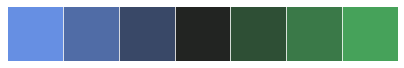

In [41]:
sns.palplot(sns.diverging_palette(255, 133, l=60, n=7, center="dark"))

* The website https://www.hsluv.org/ provides a "human-friendly" HSL palette, helpull for the parameters choice in `diverging_palette()`.

* More information about this palette, and seaborn others paletter : https://seaborn.pydata.org/tutorial/color_palettes.html

* As a last example, let's see how to create manually a colorbar: the one inspired from the precipitation return levels colorbar used by MeteoSwiss:
https://www.meteoswiss.admin.ch/home/climate/swiss-climate-in-detail/extreme-value-analyses/maps-of-extreme-precipitation.html

3 different shades of color, to represent low, intermediate and high precipitation return levels.

_Yellow/brown has the connotation of dry conditions (color of the vegetation)_

_Green to blue: the bluer the wetter_

_Black/purple to indicate wet extremes_

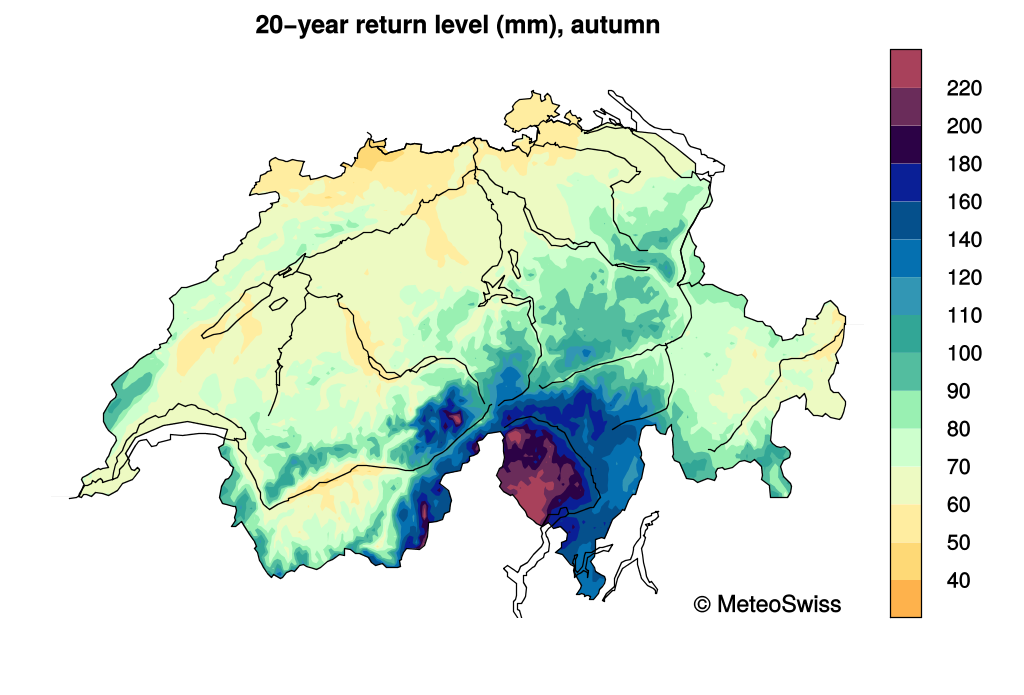

In [42]:
Image(filename="Figures/MS-prec_1-day-sum_SON_20y_RL.png")

In [43]:
# RGB codes corresponding MeteoSwiss colors:
my_MS_colors = [(247/255,173/255,74/255),(253/255,216/255,118/255),(255/255,237/255,160/255),
             (237/255,250/255,194/255),(205/255,255/255,205/255),(153/255,240/255,178/255),
             (85/255,181/255,154/255),(50/255,166/255,150/255),(50/255,150/255,180/255),
             (5/255,112/255,176/255),(5/255,80/255,140/255),(10/255,31/255,150/255),
             (44/255,2/255,70/255),(106/255,44/255,90/255),(168/255,65/255,91/255)]

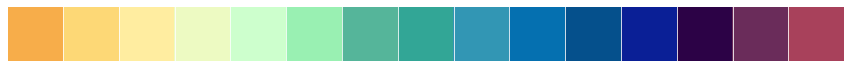

In [44]:
sns.palplot(my_MS_colors)

Let's use a part of this color for our precipitation plot

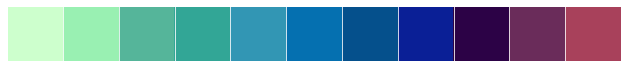

In [45]:
sns.palplot([(205/255,255/255,205/255),(153/255,240/255,178/255),
             (85/255,181/255,154/255),(50/255,166/255,150/255),(50/255,150/255,180/255),
             (5/255,112/255,176/255),(5/255,80/255,140/255),(10/255,31/255,150/255),
             (44/255,2/255,70/255),(106/255,44/255,90/255),(168/255,65/255,91/255)])

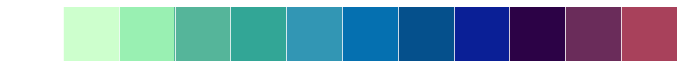

In [46]:
# White at the begining, for precip <1mm
my_precip_color = [(1,1,1),(205/255,255/255,205/255),(153/255,240/255,178/255),
             (85/255,181/255,154/255),(50/255,166/255,150/255),(50/255,150/255,180/255),
             (5/255,112/255,176/255),(5/255,80/255,140/255),(10/255,31/255,150/255),
             (44/255,2/255,70/255),(106/255,44/255,90/255),(168/255,65/255,91/255)]
sns.palplot(my_precip_color)

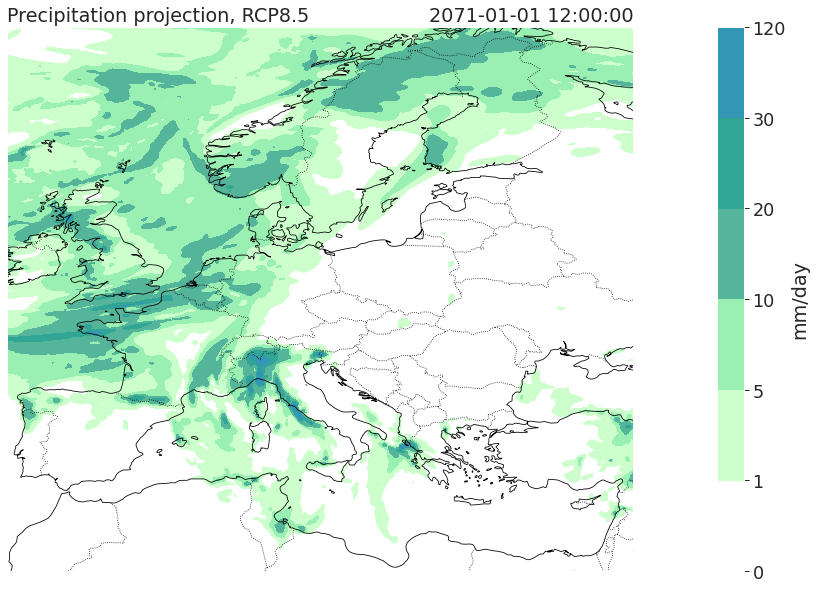

In [47]:
fig = plt.figure(figsize=(30,10))
ax = plt.axes(projection=ccrs.PlateCarree())

my_levels = [0,1,5, 10,20,30,120]

a = data_precip.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels = my_levels,
                              colors=my_precip_color, add_colorbar=False)

ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.add_feature(cfeature.BORDERS, linestyle=':')

cbar = fig.colorbar(a, ax=ax, fraction = 0.1, label=r'mm/day')


ax.set_title('')
ax.set_title(nicetime.strftime("%Y-%m-%d %H:%M:%S"), loc='right');
ax.set_title('Precipitation projection, RCP8.5', loc='left');

Remark: the last 6 colors were not used, because the number of levels we gave is smaller than the number of colors in our "home-made" colorbar.

With a "ready-to-use" sequential cmap, the 2 extreme colors are anyway kept, and as many intermediate colors as necessary are selected.

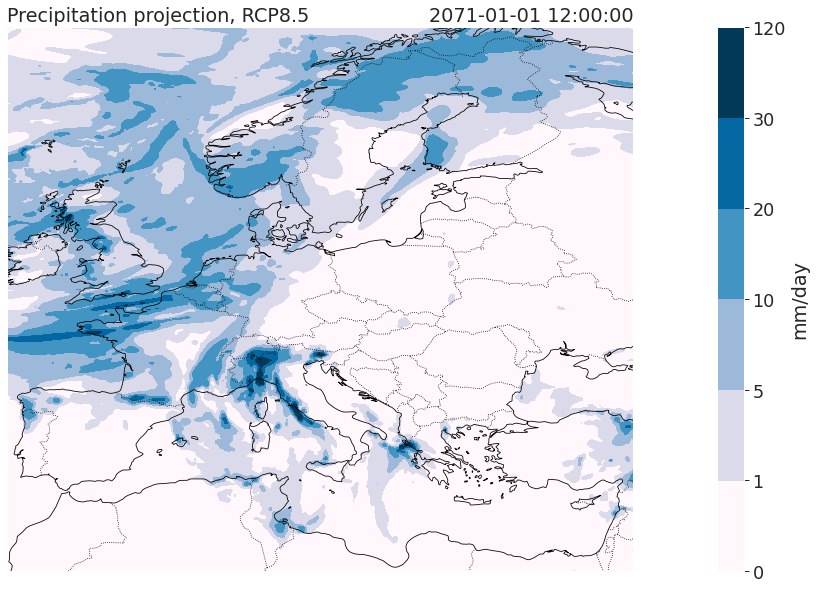

In [48]:
#exemple with "PuBu"

fig = plt.figure(figsize=(30,10))
ax = plt.axes(projection=ccrs.PlateCarree())

my_levels = [0,1,5, 10,20,30,120]

a = data_precip.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels = my_levels,
                              cmap="PuBu", add_colorbar=False)

ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.add_feature(cfeature.BORDERS, linestyle=':')
cbar = fig.colorbar(a, ax=ax, fraction = 0.1, label=r'mm/day')


ax.set_title('')
ax.set_title(nicetime.strftime("%Y-%m-%d %H:%M:%S"), loc='right');
ax.set_title('Precipitation projection, RCP8.5', loc='left');

### Great ressource for the choice of colors

http://colorbrewer2.org
Even precise if the colors chosen are colorblind friendly

In [49]:
# HEX 
my_colors = ["#c51b7d","#e9a3c9","#fde0ef","#f7f7f7","#e6f5d0","#a1d76a","#4d9221"]

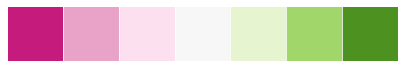

In [50]:
sns.palplot(my_colors)

In [51]:
#Alternative definition: RGB (red blue green, don't forget to divid by 255)
My_colors = [(197/255,27/255,125/255),(233/255,163/255,201/255),(253/255,224/255,239/255),(247/255,247/255,247/255),
             (230/255,245/255,208/255),(161/255,215/255,106/255),(77/255,146/255,33/255)]

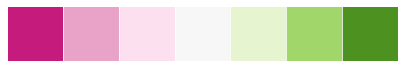

In [52]:
sns.palplot(My_colors)

## `xr.where()` command

* `xr.where()`: set to _NaN_ data that doesn't verify a given condition (NaN=not a number).

* E.g.: set precipitation below 1mm to _NaN_

In [53]:
data_precip.where(data_precip >1)

<xarray.DataArray 'pr' (lat: 409, lon: 471)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 1.19392882, 1.12383059,
        1.17262781],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
    time     datetime64[ns] 2071-01-01T12:00:00
  * lon      (lon) float64 -10.0 -9.9 -9.8 -9.7 -9.6 ... 36.7 36.8 36.9 37.0
  * lat      (lat) float64 30.0 30.1 30.2 30.3 30.4 ... 70.4 70.5 70.6 70.7 70.8

Let's use the command `where` with temperature data

We can keep only precipitation where max temperature is below 0°C, and plot it

In [54]:
data_precip.where(ds_tasmax.tasmax.isel(time=0) <273)

<xarray.DataArray 'pr' (lat: 409, lon: 471)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    time     datetime64[ns] 2071-01-01T12:00:00
  * lon      (lon) float64 -10.0 -9.9 -9.8 -9.7 -9.6 ... 36.7 36.8 36.9 37.0
  * lat      (lat) float64 30.0 30.1 30.2 30.3 30.4 ... 70.4 70.5 70.6 70.7 70.8

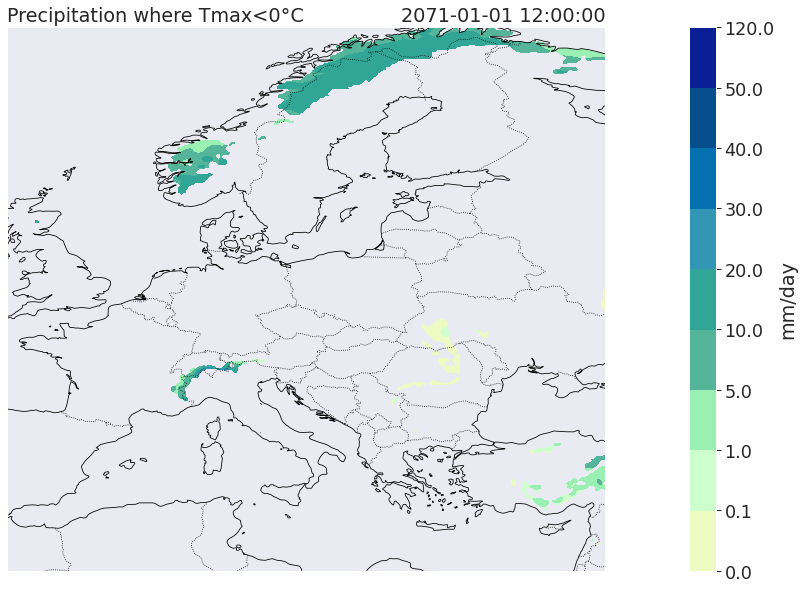

In [55]:
fig = plt.figure(figsize=(30,10))
ax = plt.axes(projection=ccrs.PlateCarree())

my_levels = [0,0.1, 1, 5, 10,20,30, 40, 50,120]

my_colors = [(237/255,250/255,194/255),(205/255,255/255,205/255),(153/255,240/255,178/255),
             (85/255,181/255,154/255),(50/255,166/255,150/255),(50/255,150/255,180/255),
             (5/255,112/255,176/255),(5/255,80/255,140/255),(10/255,31/255,150/255),
             (44/255,2/255,70/255),(106/255,44/255,90/255),(168/255,65/255,91/255)]


a = data_precip.where(ds_tasmax.tasmax.isel(time=0) <273).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels = my_levels,
                                                                        colors=my_colors, add_colorbar=False)


ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.add_feature(cfeature.BORDERS, linestyle=':')


cbar = fig.colorbar(a, ax=ax, fraction = 0.1, label=r'mm/day')


ax.set_title('')
ax.set_title(nicetime.strftime("%Y-%m-%d %H:%M:%S"), loc='right');
ax.set_title('Precipitation where Tmax<0°C', loc='left');

# Adapt the path accordingly
# to remove white space qround the plot: bbox_inches="tight",pad_inches=0
plt.savefig("Figures/daily_precip_projection_"+ nicetime.strftime("%Y-%m-%d")+".png", 
            bbox_inches="tight",pad_inches=0);